<center>
# ПРИЛОЖЕНИЕ 5
<center>
# РЕШЕНИЕ ДОМАШНЕГО ЗАДАНИЯ 1

# Этап I. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса LogisticRegression

In [1]:
# импортируем необходимые библиотеки
# загружаем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

## I.1. Загрузка исторических данных

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/Churn_logreg.csv', 
                   encoding='cp1251', sep=';')

## I.2. Вывод общей информации о датафрейме

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head(10)

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается
5,"7,68",NaN,NaN,Нет,NaN,CC,57.0,NaN,NaN,1.0,"57272,7",Остается
6,"27,37","0,2","48,9",Да,Бесплатный,CH,NaN,Женский&*,NaN,1.0,NaN,Уходит
7,"5,35",NaN,NaN,Да,NaN,NaN,55.0,Женский&*,Одинокий,0.0,"40200,7",Уходит
8,"14,77",0,"30,42",Нет,Бесплатный,CH,86.0,Мужской,NaN,0.0,"92167,3",Остается
9,"24,73",NaN,"21,17",Нет,Бюджетный,CC,28.0,Мужской,Одинокий,0.0,"37135,5",Уходит


## I.3. Изменение типов переменных

In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    data[i] = data[i].str.replace(',', '.').astype('float')
# заменяем строковые значения в переменной churn на числовые
data['churn'] = np.where(data['churn'] == 'Остается', 0, 1)
data.head(10)

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,0
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,0
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,0
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,0
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,0
5,7.68,NaN,NaN,Нет,NaN,CC,57.0,NaN,NaN,1.0,57272.7,0
6,27.37,0.2,48.90,Да,Бесплатный,CH,NaN,Женский&*,NaN,1.0,NaN,1
7,5.35,NaN,NaN,Да,NaN,NaN,55.0,Женский&*,Одинокий,0.0,40200.7,1
8,14.77,0.0,30.42,Нет,Бесплатный,CH,86.0,Мужской,NaN,0.0,92167.3,0
9,24.73,NaN,21.17,Нет,Бюджетный,CC,28.0,Мужской,Одинокий,0.0,37135.5,1


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null int64
dtypes: float64(6), int64(1), object(5)
memory usage: 415.5+ KB


## I.4. Получение подробной информации о количественных и категориальных переменных

In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income,churn
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000,4431.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896,0.436696
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264,0.496032
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000,0.000000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000,0.000000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000,0.000000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000,1.000000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000,1.000000


In [8]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn, создав список
# категориальных переменных
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital
count,4430,4427,4429,4430,4427
unique,2,2,4,4,5
top,Нет,Бюджетный,CC,Женский,Женат
freq,3054,2244,2561,2240,2620


In [9]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan 'Женский&*' 'Мужской&*']
['Женат' 'Одинокий' nan '_Одинокий' '_Женат' 'Же&нат']


In [10]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский      2240
Мужской      2183
Женский&*       4
Мужской&*       3
NaN             1
Name: gender, dtype: int64
Женат        2620
Одинокий     1800
NaN             4
_Женат          3
Же&нат          2
_Одинокий       2
Name: marital, dtype: int64


## I.5. Нормализация строковых значений и обработка редких категорий

In [11]:
# удаляем лишние символы в категориях переменных
# gender и marital
for i in ['gender', 'marital']:
    data[i] = data[i].str.replace('[*&_]', '')

# смотрим результаты
for i in ['gender', 'marital']:
    print(data[i].value_counts(dropna=False))

Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64


In [12]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna=False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

## I.6. Конструирование признаков

In [13]:
# пишем функцию, создающую парные взаимодействия
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [14]:
# применяем функцию
make_conj(data, 'gender', 'marital')

In [15]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age'] / data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace=True)

In [16]:
# поделим доход на возраст
data['ratio2'] = data['income'] / data['age']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)

In [17]:
# поделим возраст на количество детей
data['ratio3'] = data['age'] / data['children']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [18]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio4'] = data['longdist'] / data['internat']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)

## I.7. Разбиение набора данных на обучающую и контрольную выборки

In [19]:
# создаем обучающий массив признаков, обучающий массив меток,
# тестовый массив признаков, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop('churn', axis=1), 
                                                data['churn'], 
                                                test_size=.3, 
                                                stratify=data['churn'], 
                                                random_state=100)

## I.8. Импутация пропусков

In [20]:
# выводим информацию о количестве пропусков
# по каждой переменной в полученных выборках
print(train.isnull().sum())
print(test.isnull().sum())

longdist            1
internat            3
local               2
int_disc            0
billtype            3
pay                 2
age                 1
gender              1
marital             2
children            0
income              1
gender_marital      2
ratio               2
ratio2              1
ratio3              1
ratio4            357
dtype: int64
longdist            0
internat            1
local               1
int_disc            1
billtype            1
pay                 0
age                 2
gender              0
marital             2
children            1
income              0
gender_marital      2
ratio               2
ratio2              2
ratio3              2
ratio4            140
dtype: int64


In [21]:
# заменяем пропуски в количественных переменных средними, создав
# список количественных переменных для работы с циклом
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(train[i].mean(), inplace=True)

In [22]:
# заменяем пропуски в категориальных переменных модой, не забываем пересоздать список
# категориальных предикторов для работы с циклом, потому что появилась новая переменная
# gender_marital и в ней есть пропуски, нуждающиеся в импутации
categorical_columns = train.dtypes[train.dtypes == 'object'].index 
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

## I.9. Нормализация

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


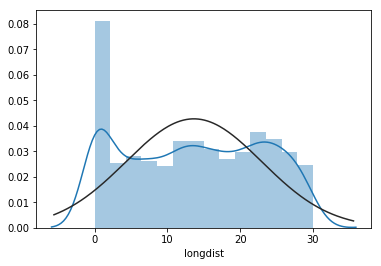

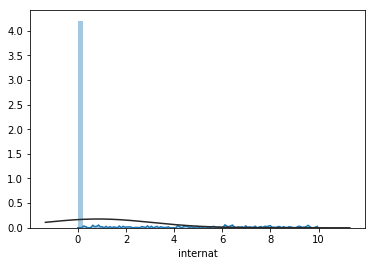

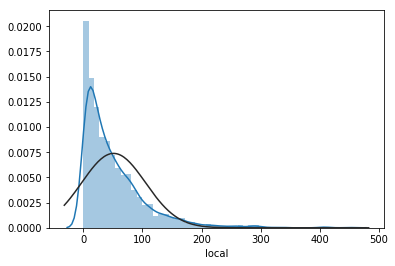

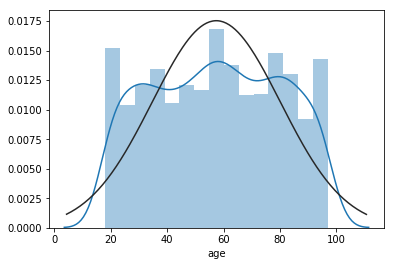

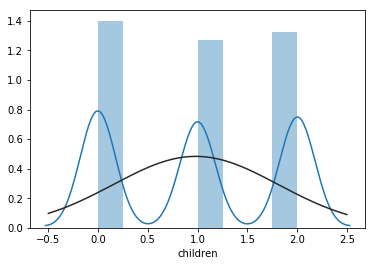

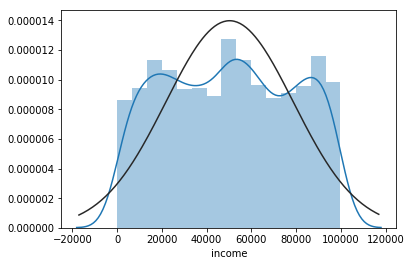

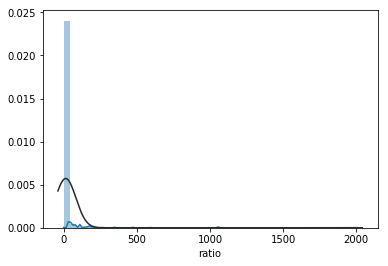

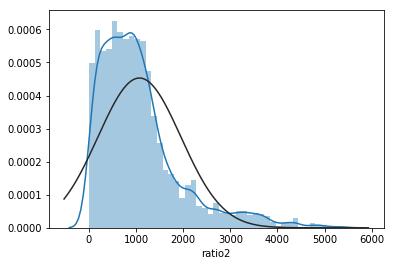

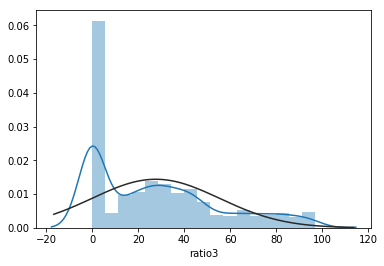

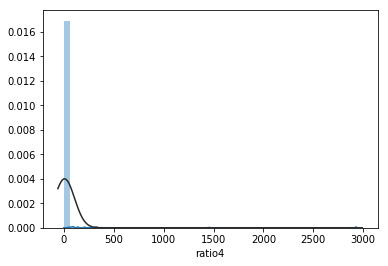

<Figure size 432x288 with 0 Axes>

In [23]:
# строим гистограмму распределения 
# для количественных переменных
for i in numerical_columns:
    sns.distplot(train[i], fit=norm)
    fig = plt.figure()    

In [24]:
# подготавливаем данные перед преобразованием Бокса-Кокса
# (данные должны быть положительными)
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [25]:
# выполняем преобразование Бокса-Кокса
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

## I.10. Биннинг

In [26]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df, target): 
    # создаем список, в который будем записывать IV
    iv_list = []
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a= 0.0001
    # задаем зависимую переменную
    target = target.astype('str')
    # создаем копию датафрейма
    df = df.copy()
    # отбираем переменные с более чем 10 уникальными значениями
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # отбираем количественные переменные
    numerical_columns = df.select_dtypes(include=['number']).columns
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:
        # разбиваем переменную на 10 квантилей
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(df[var_name], target)        
        # вычисляем IV на основе таблицы сопряженности
        IV = sum(((biv['0'] / sum(biv['0']) + a) - 
                  (biv['1'] / sum(biv['1']) + a)) * np.log(
            (biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV)
    # создаем список с названиями столбцов
    col_list = list(numerical_columns)
    # создаем датафрейм с двумя столбцами, в одном - названия переменных,
    # в другом - IV этих переменных
    result = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    # добавляем дополнительный столбец "Полезность", задаем строковые значения,
    # которые будут выводится в зависимости от величины IV
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                            if x <= 0.5 and x > 0.3 else 'Средняя'
                            if x <= 0.3 and x > 0.1 else 'Слабая' 
                            if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                            for x in result['IV']]  # по Наиму Сиддики
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [27]:
numeric_IV(train, y_train)

,Название переменной,IV,Полезность
8,ratio4,0.974741,Подозрительно высокая
0,longdist,0.538231,Подозрительно высокая
5,ratio,0.451709,Сильная
2,local,0.447525,Сильная
1,internat,0.373673,Сильная
3,age,0.118438,Средняя
6,ratio2,0.099671,Слабая
7,ratio3,0.077236,Слабая
4,income,0.035318,Слабая


In [28]:
from woe import *
woe_longdist = WoE(qnt_num=8, min_block_size=10, v_type='c', t_type='b')
woe_longdist.fit(train['longdist'], y_train)
woe_longdist.transform(train['longdist'])
print(woe_longdist.bins)

       mean  bad  obs  good       woe       bins labels
0  0.854680  347  406    59 -2.026624       -inf      0
1  0.352113  100  284   184  0.354929  -0.566469      1
2  0.433140  149  344   195  0.014216   2.168006      2
3  0.372093  128  344   216  0.268411   4.277580      3
4  0.291908  101  346   245  0.631301   5.819965      4
5  0.321739  111  345   234  0.490954   6.946839      5
6  0.392442  135  344   209  0.182223   8.226286      6
7  0.404070  139  344   205  0.133699   9.266490      7
8  0.418605  144  344   200  0.073667  10.173958      8


In [29]:
woe_longdist_monotonic = woe_longdist.force_monotonic(hypothesis=0)
print(woe_longdist_monotonic.bins)

       mean  bad   obs  good       woe      bins labels
0  0.854680  347   406    59 -2.026624      -inf      0
1  0.396497  249   628   379  0.165246 -0.566469      1
2  0.372093  128   344   216  0.268411  4.277580      2
3  0.365641  630  1723  1093  0.296125  5.819965      3


In [30]:
woe_longdist_optimized = woe_longdist.optimize(max_depth=3, min_samples_leaf=450, scoring='roc_auc', cv=10)
print(woe_longdist_optimized.bins)

       mean  bad   obs  good       woe      bins labels
0  0.828889  373   450    77 -1.832610      -inf      0
1  0.350028  629  1797  1168  0.364080  0.141052      1
2  0.412178  352   854   502  0.100132  8.814561      2


In [31]:
# создадим бины для переменной longdist
bins = [-np.inf,  0.14, 8.81, np.inf]
# выполняем биннинг переменной longdist
train['longdistcat'] = pd.cut(train['longdist'], bins).astype('object')
test['longdistcat'] = pd.cut(test['longdist'], bins).astype('object')

In [32]:
# напишем функцию для создания взаимодействия между 
# исходными категориальными признаки и переменными, 
# полученными в результате биннинга
def make_conj2(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('str') + " + " + df[feature2].astype('str')

In [33]:
# применяем написанную функцию
make_conj2(train, 'pay', 'gender_marital')
make_conj2(test, 'pay', 'gender_marital')

make_conj2(train, 'gender', 'longdistcat')
make_conj2(test, 'gender', 'longdistcat')

## I.11. Стандартизация

In [34]:
# выполняем стандартизацию количественных переменных
train_copy = train.copy()
for i in numerical_columns:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

## I.12. Проверка наличия пропусков

In [35]:
# смотрим пропуски
print(train.isnull().sum())
print(test.isnull().sum())

longdist              0
internat              0
local                 0
int_disc              0
billtype              0
pay                   0
age                   0
gender                0
marital               0
children              0
income                0
gender_marital        0
ratio                 0
ratio2                0
ratio3                0
ratio4                0
longdistcat           0
pay_gender_marital    0
gender_longdistcat    0
dtype: int64
longdist              0
internat              0
local                 0
int_disc              0
billtype              0
pay                   0
age                   0
gender                0
marital               0
children              0
income                0
gender_marital        0
ratio                 0
ratio2                0
ratio3                0
ratio4                0
longdistcat           0
pay_gender_marital    0
gender_longdistcat    0
dtype: int64


## I.13. Дамми-кодирование

In [36]:
# выполняем дамми-кодирование
X_train = pd.get_dummies(train)
X_test = pd.get_dummies(test)

## I.14. Обучение модели логистической регрессии

In [37]:
# создаем экземпляр класса LogisticRegression 
# (по сути задаем модель) и обучаем
logreg = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
# печатаем значения правильности
print("Правильность на обучающей выборке: {:.3f}".format(
    logreg.score(X_train, y_train)))
print("Правильность на контрольной выборке: {:.3f}".format(
    logreg.score(X_test, y_test)))

Правильность на обучающей выборке: 0.823
Правильность на контрольной выборке: 0.817


In [38]:
# печатаем значения AUC
print("AUC на обучающей выборке: {:.3f}".format(
    roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.898
AUC на контрольной выборке: 0.884


## I.15. Получение информации о регрессионных и экспоненциальных коэффициентах

In [39]:
# взглянем на коэффициенты логистической регрессии,
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg.coef_
feat_labels = X_train.columns

In [40]:
# вычислим свободный член (константу)
intercept = logreg.intercept_
intercept

array([-0.3456753])

In [41]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-0.35

In [42]:
# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Коэффициенты"
print("Коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))

Константа: -0.35
Коэффициенты:
longdist -0.76
internat 1.2
local -0.09
age -0.2
children -0.17
income 0.69
ratio -0.42
ratio2 -1.17
ratio3 0.25
ratio4 0.3
int_disc_Да 0.03
int_disc_Нет -0.03
billtype_Бесплатный 0.06
billtype_Бюджетный -0.06
pay_Auto -0.29
pay_CC 0.2
pay_CH 0.09
gender_Женский 0.74
gender_Мужской -0.74
marital_Женат 0.05
marital_Одинокий -0.05
gender_marital_Женский + Женат 0.4
gender_marital_Женский + Одинокий 0.34
gender_marital_Мужской + Женат -0.36
gender_marital_Мужской + Одинокий -0.38
longdistcat_(-inf, 0.14] 0.32
longdistcat_(0.14, 8.81] -0.44
longdistcat_(8.81, inf] 0.11
pay_gender_marital_Auto + Женский + Женат 0.53
pay_gender_marital_Auto + Женский + Одинокий -0.06
pay_gender_marital_Auto + Мужской + Женат 0.0
pay_gender_marital_Auto + Мужской + Одинокий -0.77
pay_gender_marital_CC + Женский + Женат -0.16
pay_gender_marital_CC + Женский + Одинокий 0.26
pay_gender_marital_CC + Мужской + Женат 0.09
pay_gender_marital_CC + Мужской + Одинокий 0.02
pay_gender_mari

In [43]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспоненциальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.35
Экспоненциальные коэффициенты:
longdist 0.466
internat 3.304
local 0.914
age 0.822
children 0.847
income 1.996
ratio 0.66
ratio2 0.311
ratio3 1.28
ratio4 1.351
int_disc_Да 1.027
int_disc_Нет 0.974
billtype_Бесплатный 1.061
billtype_Бюджетный 0.943
pay_Auto 0.75
pay_CC 1.219
pay_CH 1.093
gender_Женский 2.092
gender_Мужской 0.478
marital_Женат 1.047
marital_Одинокий 0.956
gender_marital_Женский + Женат 1.494
gender_marital_Женский + Одинокий 1.4
gender_marital_Мужской + Женат 0.7
gender_marital_Мужской + Одинокий 0.683
longdistcat_(-inf, 0.14] 1.378
longdistcat_(0.14, 8.81] 0.647
longdistcat_(8.81, inf] 1.122
pay_gender_marital_Auto + Женский + Женат 1.703
pay_gender_marital_Auto + Женский + Одинокий 0.945
pay_gender_marital_Auto + Мужской + Женат 1.004
pay_gender_marital_Auto + Мужской + Одинокий 0.464
pay_gender_marital_CC + Женский + Женат 0.849
pay_gender_marital_CC + Женский + Одинокий 1.293
pay_gender_marital_CC + Мужской + Женат 1.092
pay_gender_marital_CC + Мужск

## I.16. Поиск оптимального значения силы регуляризации

In [44]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(solver='lbfgs', max_iter=200, 
                                 penalty='l2', random_state=42)
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid_logreg = {'C': [0.2, 0.4, 0.6, 0.8, 1]}
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid_logreg, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=skf)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.884
Наилучшее значение гиперпараметра C: {'C': 1}
Наилучшее значение AUC: 0.891


# Этап II. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса LogisticRegression

## II.1. Загрузка исторических данных

In [45]:
# записываем CSV-файл в объект DataFrame
fulldata = pd.read_csv('Data/Churn_logreg.csv', 
                       encoding='cp1251', sep=';')

## II.2. Предварительная обработка исторических данных

In [46]:
# пишем функцию, выполняющую предварительную обработку
# исторических данных
def preprocessing(df):
    # заменяем запятые на точки и преобразуем в тип float
    for i in ['longdist', 'internat', 'local', 'income']:
        df[i] = df[i].str.replace(',', '.').astype('float')
    # удаляем возможные лишние символы (все символы, не являющиеся 
    # буквами, символы нижнего подчеркивания и цифры) в категориях 
    # переменных gender и marital
    for i in ['gender', 'marital']:
        df[i] = df[i].str.replace('[\d+\W_]', '')
    # все новые категории переменной pay заменяем модой
    replace_new_values = lambda s: 'CC' if s not in ['CC', 'Auto', 'CH', np.NaN] else s
    df['pay'] = df['pay'].map(replace_new_values)
    # создаем переменную - результат конъюнкции
    df['gender_marital'] = df['gender'].astype('object') + " + " + df['marital'].astype('object')
    # поделим возраст на длительность междугородних звонков в минутах
    df['ratio'] = df['age'] / df['longdist']
    # заменяем бесконечные значения на 1
    df['ratio'].replace([np.inf, -np.inf], 1, inplace=True)
    # поделим доход на возраст
    df['ratio2'] = df['income'] / df['age']
    # заменяем бесконечные значения на 0
    df['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим возраст на количество детей
    df['ratio3'] = df['age'] / df['children']
    # заменяем бесконечные значения на 0
    df['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим длительность междугородних звонков в минутах на
    # длительность международных звонков в минутах
    df['ratio4'] = df['longdist'] / df['internat']
    # заменяем бесконечные значения на 0
    df['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)
    # заменяем пропуски в количественных переменных средними, создав
    # список количественных переменных для работы с циклом
    numerical_columns = df.dtypes[df.dtypes != 'object'].index 
    for i in numerical_columns:
        df[i].fillna(df[i].mean(), inplace=True)
    # заменяем пропуски в категориальных переменных модами, создав
    # список категориальных переменных для работы с циклом
    categorical_columns = df.dtypes[df.dtypes == 'object'].index 
    for i in categorical_columns:
        df[i].fillna(df[i].value_counts().index[0], inplace=True)
    # подготавливаем данные перед преобразованием Бокса-Кокса
    # (данные должны быть положительными)
    df.replace({0: 0.5}, inplace=True)
    # выполняем преобразование Бокса-Кокса
    for i in numerical_columns:  
        df[i], fitted_lambda = boxcox(df[i])    
    # создадим бины для переменной longdist
    bins = [-np.inf, 0.14, 8.81, np.inf]
    # выполняем биннинг переменной longdist
    df['longdistcat'] = pd.cut(df['longdist'], bins).astype('object')
    # создаем переменные-взаимодействия
    df['pay_gender_marital'] = df['pay'].astype('str') + " + " + df['gender_marital'].astype('str')
    df['gender_longdistcat'] = df['gender'].astype('str') + " + " + df['longdistcat'].astype('str')

In [47]:
# заменяем строковые значения в переменной churn на числовые
fulldata['churn'] = np.where(fulldata['churn'] == 'Остается', 0, 1)

# применяем функцию предварительной обработки 
# ко всем историческим данным
y = fulldata.pop('churn')
preprocessing(fulldata)

In [48]:
fulldata_copy = fulldata.copy()
# выполняем стандартизацию
for i in numerical_columns:    
    fulldata[i] = (fulldata[i] - fulldata[i].mean()) / fulldata[i].std()

In [49]:
# выполняем дамми-кодирование
X = pd.get_dummies(fulldata)

## II.3. Обучение модели логистической регрессии на всех исторических данных

In [50]:
# обучаем модель
full_logreg = LogisticRegression(C=0.6, solver='lbfgs', max_iter=200, penalty='l2').fit(X, y)
print("AUC на всей исторической выборке: {:.3f}".format(
    roc_auc_score(y, full_logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.894


## II.4. Загрузка новых данных

In [51]:
# записываем CSV-файл, содержащий новые данные,
# в объект DataFrame
newdata = pd.read_csv('Data/Churn_new.csv', 
                      encoding='utf-8', sep=';')

## II.5. Предварительная обработка новых данных

In [52]:
# выполняем предварительную обработку
# новых данных
preprocessing(newdata)

In [53]:
# выполняем стандартизацию количественных переменных 
for i in numerical_columns:
    newdata[i] = (newdata[i] - fulldata_copy[i].mean()) / fulldata_copy[i].std()

In [54]:
# выполняем дамми-кодирование
# новых данных
X_new = pd.get_dummies(newdata)

## II.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [55]:
# вычисляем вероятности классов для новых данных
prob = full_logreg.predict_proba(X_new)
# выведем вероятности для первых 5 наблюдений
prob[:5]

array([[0.02091904, 0.97908096],
       [0.02063462, 0.97936538],
       [0.9518618 , 0.0481382 ],
       [0.93428001, 0.06571999],
       [0.01604543, 0.98395457]])

In [56]:
# создаем на основе вероятностей датафрейм
probabilities = pd.DataFrame(prob, index=newdata.index, columns=['Prob0', 'Prob1'])
# конкатенируем датафрейм с исходными переменными и датафрейм с вероятностями
result = pd.concat([newdata, probabilities], axis=1)
result.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,...,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,pay_gender_marital,gender_longdistcat,Prob0,Prob1
0,1.432476,2.574073,0.457483,Нет,Бюджетный,CH,-1.982914,Женский,Одинокий,0.021848,...,Женский + Одинокий,-0.975133,2.348438,0.655148,1.128119,"(8.81, inf]",CH + Женский + Одинокий,"Женский + (8.81, inf]",0.020919,0.979081
1,1.299037,2.496011,-0.229161,Да,Бесплатный,CH,-1.827545,Женский,Женат,1.211767,...,Женский + Женат,-0.602935,2.028234,0.287901,1.145414,"(8.81, inf]",CH + Женский + Женат,"Женский + (8.81, inf]",0.020635,0.979365
2,0.276202,-0.262546,0.392617,Да,Бесплатный,CH,-1.627641,Мужской,Женат,-1.214628,...,Мужской + Женат,0.262985,0.699691,-1.287665,-0.618638,"(0.14, 8.81]",CH + Мужской + Женат,"Мужской + (0.14, 8.81]",0.951862,0.048138
3,1.773268,-0.262546,1.291012,Нет,Бесплатный,CC,-1.704991,Мужской,Одинокий,0.021848,...,Мужской + Одинокий,-0.638252,0.299497,0.994430,-0.618638,"(8.81, inf]",CC + Мужской + Одинокий,"Мужской + (8.81, inf]",0.934280,0.065720
4,-1.672446,-0.262546,-1.406581,Да,Бесплатный,CH,-1.724840,Женский,Одинокий,1.211767,...,Женский + Одинокий,-1.517753,2.972205,0.386932,0.943256,"(-inf, 0.14]",CH + Женский + Одинокий,"Женский + (-inf, 0.14]",0.016045,0.983955


# Этап III. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

In [57]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 16 hours 22 mins
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,2 months and 15 days
H2O cluster name:,H2O_from_python_artemgruzdev_u4icul
H2O cluster total nodes:,1
H2O cluster free memory:,6.577 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


## III.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [58]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [59]:
# сейчас нам надо задать переменные для транслитерации
cat_cols = ['int_disc', 'billtype', 'pay', 'gender', 
            'marital', 'gender_marital', 'pay_gender_marital',
            'gender_longdistcat']

In [60]:
# выполняем транслитерацию
for i in cat_cols:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed=True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed=True))

In [61]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in cat_cols:
    print(train[c].unique())

['Da' 'Net']
['Bjudzhetnyj' 'Besplatnyj']
['Auto' 'CC' 'CH']
['Muzhskoj' 'Zhenskij']
['Zhenat' 'Odinokij']
['Muzhskoj + Zhenat' 'Zhenskij + Zhenat' 'Muzhskoj + Odinokij'
 'Zhenskij + Odinokij']
['Auto + Muzhskoj + Zhenat' 'CC + Muzhskoj + Zhenat'
 'CC + Zhenskij + Zhenat' 'CC + Muzhskoj + Odinokij'
 'CH + Muzhskoj + Zhenat' 'CH + Muzhskoj + Odinokij'
 'CC + Zhenskij + Odinokij' 'Auto + Zhenskij + Zhenat'
 'CH + Zhenskij + Zhenat' 'CH + Zhenskij + Odinokij'
 'Auto + Zhenskij + Odinokij' 'Auto + Muzhskoj + Odinokij']
['Muzhskoj + (0.14, 8.81]' 'Zhenskij + (8.81, inf]'
 'Muzhskoj + (8.81, inf]' 'Muzhskoj + (-inf, 0.14]'
 'Zhenskij + (0.14, 8.81]' 'Zhenskij + (-inf, 0.14]']


## III.2. Преобразование обучающего и контрольного наборов во фреймы H2O

In [62]:
# конкатенируем датафреймы
tr = pd.concat([train, y_train], axis=1)
tst = pd.concat([test, y_test], axis=1)

# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
given_types = {'churn': 'enum'}
tr = h2o.H2OFrame(tr, column_types=given_types)
tst = h2o.H2OFrame(tst, column_types=given_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3101
Cols:20




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,pay_gender_marital,gender_longdistcat,churn
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,real,real,real,real,enum,enum,enum,enum
mins,-1.9149698435170095,-11.73742424707928,-2.744828359294355,,,,-1.8445802264103368,,,-1.1950547266261482,-2.2034984972112497,,-2.2840903180021677,-2.950192604322097,-1.2812530033976763,-9.21687327609607,,,,
mean,4.4917953904988206e-15,1.2176024077881209e-14,-3.1750860621237997e-15,,,,-1.2362290011114219e-14,,,-1.1188424318964163e-15,3.5416548166411488e-15,,-3.168445323817326e-15,6.472686969738461e-16,-1.2563355304001655e-14,-7.379134196044967e-15,,,,
maxs,1.4636807371941352,2.541848759631174,3.104772692219818,,,,1.654812101276158,,,1.22641784832053,1.5675700619364477,,2.738135956032496,2.878440388174274,1.4620816135488617,2.3119942709268475,,,,
sigma,0.999999999999999,1.0000000000000009,0.9999999999999983,,,,0.999999999999996,,,1.0000000000000033,0.9999999999999977,,1.0000000000000022,0.9999999999999989,0.9999999999999916,1.0000000000000007,,,,
zeros,0,0,0,,,,0,,,0,0,,0,0,0,0,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.015984609059407615,-0.31087579153746725,1.2735730315146023,Da,Bjudzhetnyj,Auto,-1.317681000656586,Muzhskoj,Zhenat,0.03635442920301024,0.17522203777188508,Muzhskoj + Zhenat,-0.3492579473719849,1.0290672265575396,0.4803608655715362,-0.4998295148455942,"(0.14, 8.81]",Auto + Muzhskoj + Zhenat,"Muzhskoj + (0.14, 8.81]",0
1,0.31526232312529867,-0.31087579153746725,1.0683955393595077,Net,Bjudzhetnyj,Auto,-1.3682878011850774,Muzhskoj,Zhenat,1.22641784832053,0.09435166233390628,Muzhskoj + Zhenat,-0.6846193560201017,1.0123737525232546,0.02526949010405875,-0.4998295148455942,"(0.14, 8.81]",Auto + Muzhskoj + Zhenat,"Muzhskoj + (0.14, 8.81]",0
2,0.7884008437032997,-0.31087579153746725,0.400956057478863,Net,Besplatnyj,CC,1.577374617105621,Muzhskoj,Zhenat,0.03635442920301024,0.5860088033311934,Muzhskoj + Zhenat,0.3670365248159406,-0.22293808457473263,1.443121911680328,-0.4998295148455942,"(0.14, 8.81]",CC + Muzhskoj + Zhenat,"Muzhskoj + (0.14, 8.81]",0


## III.3. Определение имени зависимой переменной и списка имен предикторов

In [64]:
# задаем название зависимой переменной
dependent = 'churn'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

## III.4. Обучение модели логистической регрессии

In [65]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [66]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family='binomial')
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


## III.5. Работа с результатами модели

In [67]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1558189300642_1250


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12658514594266218
RMSE: 0.3557880632380212
LogLoss: 0.3987197686847715
Null degrees of freedom: 3100
Residual degrees of freedom: 3062
Null deviance: 4248.958432649865
Residual deviance: 2472.8600053829527
AIC: 2550.8600053829527
AUC: 0.8975257436466312
pr_auc: 0.8501225376597872
Gini: 0.7950514872932624
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4309389360240875: 


,0,1,Error,Rate
0,1343.0,404.0,0.2313,(404.0/1747.0)
1,132.0,1222.0,0.0975,(132.0/1354.0)
Total,1475.0,1626.0,0.1728,(536.0/3101.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4309389,0.8201342,235.0
max f2,0.3080584,0.8968210,278.0
max f0point5,0.5721333,0.7923052,173.0
max accuracy,0.4380072,0.8284424,232.0
max precision,0.9943986,1.0,0.0
max recall,0.0190668,1.0,387.0
max specificity,0.9943986,1.0,0.0
max absolute_mcc,0.4380072,0.6668361,232.0
max min_per_class_accuracy,0.5063739,0.8202633,205.0
max mean_per_class_accuracy,0.4380072,0.8359429,232.0


Gains/Lift Table: Avg response rate: 43,66 %, avg score: 43,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103193,0.9878663,2.2902511,2.2902511,1.0,0.9901665,1.0,0.9901665,0.0236337,0.0236337,129.0251108,129.0251108
,2,0.0206385,0.9836386,2.2902511,2.2902511,1.0,0.9850534,1.0,0.9876100,0.0236337,0.0472674,129.0251108,129.0251108
,3,0.0306353,0.9811509,2.0686139,2.2179274,0.9032258,0.9820723,0.9684211,0.9858029,0.0206795,0.0679468,106.8613904,121.7927389
,4,0.0403096,0.9797060,2.1375677,2.1986411,0.9333333,0.9802434,0.96,0.9844687,0.0206795,0.0886263,113.7567701,119.8641064
,5,0.0506288,0.9771369,2.1471104,2.1881380,0.9375,0.9782285,0.9554140,0.9831968,0.0221566,0.1107829,114.7110414,118.8138001
,6,0.1002902,0.9585745,2.0969182,2.1429681,0.9155844,0.9689415,0.9356913,0.9761379,0.1041359,0.2149188,109.6918222,114.2968078
,7,0.1509191,0.8903795,2.0130870,2.0993968,0.8789809,0.9292928,0.9166667,0.9604228,0.1019202,0.3168390,101.3086961,109.9396849
,8,0.2002580,0.7862230,1.7363995,2.0099627,0.7581699,0.8390481,0.8776167,0.9305189,0.0856721,0.4025111,73.6399533,100.9962727
,9,0.3002257,0.6408498,1.7435460,1.9212525,0.7612903,0.7027364,0.8388829,0.8546729,0.1742984,0.5768095,74.3546005,92.1252541
,10,0.4001935,0.5595740,1.6031758,1.8417974,0.7,0.5993488,0.8041902,0.7908933,0.1602659,0.7370753,60.3175775,84.1797426




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1334336292575039
RMSE: 0.36528568170338116
LogLoss: 0.42252271800341756
Null degrees of freedom: 1329
Residual degrees of freedom: 1291
Null deviance: 1822.4938872916784
Residual deviance: 1123.9104298890907
AIC: 1201.9104298890907
AUC: 0.8844207652659083
pr_auc: 0.833775253520977
Gini: 0.7688415305318166
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.393901507455422: 


,0,1,Error,Rate
0,568.0,181.0,0.2417,(181.0/749.0)
1,48.0,533.0,0.0826,(48.0/581.0)
Total,616.0,714.0,0.1722,(229.0/1330.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3939015,0.8231660,247.0
max f2,0.3093078,0.8855673,274.0
max f0point5,0.4985478,0.7885065,207.0
max accuracy,0.3939015,0.8278195,247.0
max precision,0.9945567,1.0,0.0
max recall,0.0194658,1.0,387.0
max specificity,0.9945567,1.0,0.0
max absolute_mcc,0.3939015,0.6721429,247.0
max min_per_class_accuracy,0.4920324,0.8197597,210.0
max mean_per_class_accuracy,0.3939015,0.8378641,247.0


Gains/Lift Table: Avg response rate: 43,68 %, avg score: 42,37 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0120301,0.9884578,2.2891566,2.2891566,1.0,0.9908318,1.0,0.9908318,0.0275387,0.0275387,128.9156627,128.9156627
,2,0.0210526,0.9843210,2.2891566,2.2891566,1.0,0.9850452,1.0,0.9883519,0.0206540,0.0481928,128.9156627,128.9156627
,3,0.0300752,0.9811332,2.2891566,2.2891566,1.0,0.9826598,1.0,0.9866442,0.0206540,0.0688468,128.9156627,128.9156627
,4,0.0406015,0.9786513,2.1256454,2.2467648,0.9285714,0.9797612,0.9814815,0.9848597,0.0223752,0.0912220,112.5645439,124.6764837
,5,0.0503759,0.9754662,1.9369787,2.1866571,0.8461538,0.9769081,0.9552239,0.9833169,0.0189329,0.1101549,93.6978684,118.6657076
,6,0.1015038,0.9567388,2.0535082,2.1195895,0.8970588,0.9665831,0.9259259,0.9748880,0.1049914,0.2151463,105.3508150,111.9589469
,7,0.1503759,0.8722493,1.9369787,2.0602410,0.8461538,0.9173782,0.9,0.9561973,0.0946644,0.3098107,93.6978684,106.0240964
,8,0.2,0.7530051,1.7342096,1.9793460,0.7575758,0.8133828,0.8646617,0.9207622,0.0860585,0.3958692,73.4209566,97.9345955
,9,0.3,0.6291735,1.6867470,1.8818130,0.7368421,0.6844325,0.8220551,0.8419856,0.1686747,0.5645439,68.6746988,88.1812966
,10,0.4007519,0.5493271,1.6570761,1.8253125,0.7238806,0.5904057,0.7973734,0.7787366,0.1669535,0.7314974,65.7076065,82.5312507



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-05-20 09:43:57,0.000 sec,0,2124.4792163,0.6850949
,2019-05-20 09:43:57,0.003 sec,1,1350.7283767,0.4370006
,2019-05-20 09:43:57,0.004 sec,2,1251.0900237,0.4057444
,2019-05-20 09:43:57,0.005 sec,3,1237.1871386,0.4017833
,2019-05-20 09:43:57,0.006 sec,4,1236.4437429,0.4016614
,2019-05-20 09:43:57,0.007 sec,5,1236.4300027,0.4016634


## III.6. Вывод ROC-кривой

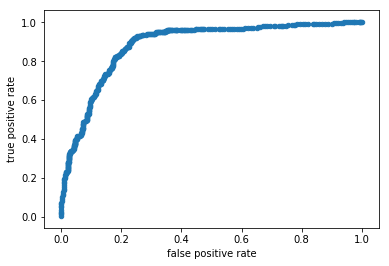

In [68]:
# выводим ROC-кривую для контрольной выборки
tmp = glm_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 'true positive rate': tmp[1]})
df.plot(kind='scatter', x='false positive rate', y='true positive rate')

## III.7. Вывод таблицы коэффициентов 

In [69]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,0.087021,0.087021
1,pay_gender_marital.Auto + Muzhskoj + Odinokij,-0.831555,-0.831555
2,pay_gender_marital.Auto + Muzhskoj + Zhenat,0.000000,0.000000
3,pay_gender_marital.Auto + Zhenskij + Odinokij,-0.073423,-0.073423
4,pay_gender_marital.Auto + Zhenskij + Zhenat,0.521257,0.521257
5,pay_gender_marital.CC + Muzhskoj + Odinokij,0.000000,0.000000
6,pay_gender_marital.CC + Muzhskoj + Zhenat,0.112307,0.112307
7,pay_gender_marital.CC + Zhenskij + Odinokij,0.270214,0.270214
8,pay_gender_marital.CC + Zhenskij + Zhenat,-0.097928,-0.097928
9,pay_gender_marital.CH + Muzhskoj + Odinokij,0.228244,0.228244


## III.7. Добавление взаимодействий признаков в модель

In [70]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family='binomial', 
                                           interactions=['pay', 'billtype', 'marital'])
# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [71]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1558189300642_1253


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1265086965531157
RMSE: 0.35568061031368536
LogLoss: 0.39765511396991865
Null degrees of freedom: 3100
Residual degrees of freedom: 3059
Null deviance: 4248.958432649865
Residual deviance: 2466.257016841436
AIC: 2550.257016841436
AUC: 0.8977066826524306
pr_auc: 0.8512792364669783
Gini: 0.7954133653048612
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4073383683094911: 


,0,1,Error,Rate
0,1300.0,447.0,0.2559,(447.0/1747.0)
1,106.0,1248.0,0.0783,(106.0/1354.0)
Total,1406.0,1695.0,0.1783,(553.0/3101.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4073384,0.8186291,243.0
max f2,0.3026187,0.8967503,276.0
max f0point5,0.5076147,0.7899972,202.0
max accuracy,0.4807201,0.8265076,213.0
max precision,0.9945312,1.0,0.0
max recall,0.0156617,1.0,389.0
max specificity,0.9945312,1.0,0.0
max absolute_mcc,0.4073384,0.6633645,243.0
max min_per_class_accuracy,0.5054942,0.8219805,203.0
max mean_per_class_accuracy,0.4073384,0.8329231,243.0


Gains/Lift Table: Avg response rate: 43,66 %, avg score: 43,66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103193,0.9871005,2.2902511,2.2902511,1.0,0.9899537,1.0,0.9899537,0.0236337,0.0236337,129.0251108,129.0251108
,2,0.0206385,0.9840510,2.2902511,2.2902511,1.0,0.9856785,1.0,0.9878161,0.0236337,0.0472674,129.0251108,129.0251108
,3,0.0303128,0.9810071,2.2902511,2.2902511,1.0,0.9822034,1.0,0.9860248,0.0221566,0.0694239,129.0251108,129.0251108
,4,0.0403096,0.9794173,1.9208558,2.1986411,0.8387097,0.9799861,0.96,0.9845272,0.0192024,0.0886263,92.0855768,119.8641064
,5,0.0506288,0.9773254,2.0755401,2.1735504,0.90625,0.9783300,0.9490446,0.9832641,0.0214180,0.1100443,107.5540066,117.3550414
,6,0.1002902,0.9578705,2.1415335,2.1576964,0.9350649,0.9687461,0.9421222,0.9760751,0.1063516,0.2163959,114.1533503,115.7696381
,7,0.1502741,0.8931545,2.0095106,2.1084071,0.8774194,0.9301530,0.9206009,0.9608006,0.1004431,0.3168390,100.9510649,110.8407136
,8,0.2002580,0.7899810,1.7730976,2.0247147,0.7741935,0.8423280,0.8840580,0.9312302,0.0886263,0.4054653,77.3097632,102.4714748
,9,0.3005482,0.6459065,1.6863907,1.9118191,0.7363344,0.7054926,0.8347639,0.8559036,0.1691285,0.5745938,68.6390687,91.1819058
,10,0.4001935,0.5635515,1.6157759,1.8381064,0.7055016,0.6018800,0.8025786,0.7926536,0.1610044,0.7355982,61.5775862,83.8106449




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13362308091449573
RMSE: 0.3655449095726758
LogLoss: 0.42199216477077744
Null degrees of freedom: 1329
Residual degrees of freedom: 1288
Null deviance: 1822.4938872916784
Residual deviance: 1122.499158290268
AIC: 1206.499158290268
AUC: 0.8845287692827385
pr_auc: 0.8341716124183838
Gini: 0.769057538565477
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3948490642498339: 


,0,1,Error,Rate
0,574.0,175.0,0.2336,(175.0/749.0)
1,57.0,524.0,0.0981,(57.0/581.0)
Total,631.0,699.0,0.1744,(232.0/1330.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3948491,0.8187500,244.0
max f2,0.1805461,0.8845052,295.0
max f0point5,0.5551897,0.7856341,179.0
max accuracy,0.3948491,0.8255639,244.0
max precision,0.9944273,1.0,0.0
max recall,0.0156338,1.0,390.0
max specificity,0.9944273,1.0,0.0
max absolute_mcc,0.3948491,0.6637639,244.0
max min_per_class_accuracy,0.4922229,0.8106713,207.0
max mean_per_class_accuracy,0.3948491,0.8341242,244.0


Gains/Lift Table: Avg response rate: 43,68 %, avg score: 42,35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112782,0.9892431,2.2891566,2.2891566,1.0,0.9911383,1.0,0.9911383,0.0258176,0.0258176,128.9156627,128.9156627
,2,0.0203008,0.9832754,2.2891566,2.2891566,1.0,0.9853250,1.0,0.9885546,0.0206540,0.0464716,128.9156627,128.9156627
,3,0.0308271,0.9810071,2.2891566,2.2891566,1.0,0.9818723,1.0,0.9862729,0.0240964,0.0705680,128.9156627,128.9156627
,4,0.0413534,0.9788927,1.9621343,2.2059146,0.8571429,0.9795302,0.9636364,0.9845566,0.0206540,0.0912220,96.2134251,120.5914567
,5,0.0511278,0.9759295,1.9369787,2.1545004,0.8461538,0.9771719,0.9411765,0.9831448,0.0189329,0.1101549,93.6978684,115.4500354
,6,0.1015038,0.9557191,2.0499910,2.1026328,0.8955224,0.9666545,0.9185185,0.9749607,0.1032702,0.2134251,104.9991009,110.2632753
,7,0.1503759,0.8754483,2.0426321,2.0831325,0.8923077,0.9177823,0.91,0.9563777,0.0998279,0.3132530,104.2632067,108.3132530
,8,0.2,0.7528584,1.5954728,1.9621343,0.6969697,0.8168935,0.8571429,0.9217689,0.0791738,0.3924269,59.5472800,96.2134251
,9,0.3,0.6359623,1.6867470,1.8703385,0.7368421,0.6840404,0.8170426,0.8425261,0.1686747,0.5611015,68.6746988,87.0338497
,10,0.4,0.5483247,1.6523236,1.8158348,0.7218045,0.5908134,0.7932331,0.7795979,0.1652324,0.7263339,65.2323580,81.5834768



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-05-20 09:43:57,0.000 sec,0,2124.4792163,0.6850949
,2019-05-20 09:43:57,0.004 sec,1,1347.7614105,0.4360812
,2019-05-20 09:43:57,0.005 sec,2,1247.8530195,0.4047618
,2019-05-20 09:43:57,0.007 sec,3,1233.8973148,0.4007673
,2019-05-20 09:43:57,0.008 sec,4,1233.1433814,0.4006431
,2019-05-20 09:43:57,0.009 sec,5,1233.1285084,0.4006433


## III.8. Вычисление p-значений коэффициентов

In [72]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_=0, family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, 
                 training_frame=tr, validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [73]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-2.038429,0.457160,-4.458893,8.238402e-06,-2.038429
1,pay_gender_marital.Auto + Muzhskoj + Zhenat,0.993822,0.439002,2.263821,2.358515e-02,0.993822
2,pay_gender_marital.Auto + Zhenskij + Odinokij,3.028956,0.570143,5.312623,1.080585e-07,3.028956
3,pay_gender_marital.Auto + Zhenskij + Zhenat,3.802346,0.564139,6.740086,1.582923e-11,3.802346
4,pay_gender_marital.CC + Muzhskoj + Odinokij,1.385070,0.399895,3.463588,5.330223e-04,1.385070
5,pay_gender_marital.CC + Muzhskoj + Zhenat,1.577682,0.390715,4.037937,5.392324e-05,1.577682
6,pay_gender_marital.CC + Zhenskij + Odinokij,3.835881,0.552442,6.943500,3.825051e-12,3.835881
7,pay_gender_marital.CC + Zhenskij + Zhenat,3.566861,0.553325,6.446232,1.146653e-10,3.566861
8,pay_gender_marital.CH + Muzhskoj + Odinokij,1.649305,0.452816,3.642327,2.701841e-04,1.649305
9,pay_gender_marital.CH + Muzhskoj + Zhenat,0.886384,0.452294,1.959751,5.002489e-02,0.886384


## III.9. Решетчатый поиск

In [74]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda_ - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', 
                                                         lambda_search=True),
                           grid_id='gr_logreg_output', hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [75]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha                  model_ids              logloss
0     [0.6]   gr_logreg_output_model_7  0.40782251279576526
1     [0.5]   gr_logreg_output_model_6  0.40784772912210315
2     [0.0]   gr_logreg_output_model_1  0.40787430438940847
3     [0.7]   gr_logreg_output_model_8  0.40788041744078857
4     [0.2]   gr_logreg_output_model_3   0.4078883686814712
5     [0.8]   gr_logreg_output_model_9  0.40789277487412107
6     [0.4]   gr_logreg_output_model_5  0.40790418615795404
7     [0.1]   gr_logreg_output_model_2  0.40790718837031165
8     [0.3]   gr_logreg_output_model_4   0.4079079404244451
9     [0.9]  gr_logreg_output_model_10  0.40792694580044725
10    [1.0]  gr_logreg_output_model_11  0.40796190531587656


In [76]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha                  model_ids                 auc
0     [0.6]   gr_logreg_output_model_7  0.8908170495274026
1     [0.1]   gr_logreg_output_model_2  0.8908100740750761
2     [0.0]   gr_logreg_output_model_1  0.8908077489243006
3     [0.7]   gr_logreg_output_model_8  0.8907568069845838
4     [0.3]   gr_logreg_output_model_4  0.8906752153300995
5     [0.5]   gr_logreg_output_model_6  0.8906692967644892
6     [0.2]   gr_logreg_output_model_3  0.8906580937652985
7     [1.0]  gr_logreg_output_model_11  0.8906221596169505
8     [0.9]  gr_logreg_output_model_10  0.8906196230888317
9     [0.8]   gr_logreg_output_model_9  0.8906194117114885
10    [0.4]   gr_logreg_output_model_5  0.8905809410350218


## III.10. Извлечение наилучшей модели по итогам решетчатого поиска

In [77]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gr_logreg_output_model_7


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12685731120835328
RMSE: 0.3561703401581233
LogLoss: 0.3992034813713053
Null degrees of freedom: 3100
Residual degrees of freedom: 3065
Null deviance: 4248.958432649865
Residual deviance: 2475.8599914648353
AIC: 2547.8599914648353
AUC: 0.8970938997344254
pr_auc: 0.8501394675190336
Gini: 0.7941877994688509
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4291259858066996: 


,0,1,Error,Rate
0,1343.0,404.0,0.2313,(404.0/1747.0)
1,126.0,1228.0,0.0931,(126.0/1354.0)
Total,1469.0,1632.0,0.1709,(530.0/3101.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4291260,0.8225050,231.0
max f2,0.3115480,0.8959617,278.0
max f0point5,0.5026071,0.7895484,200.0
max accuracy,0.4291260,0.8290874,231.0
max precision,0.9932741,1.0,0.0
max recall,0.0214710,1.0,387.0
max specificity,0.9932741,1.0,0.0
max absolute_mcc,0.4291260,0.6711685,231.0
max min_per_class_accuracy,0.5026071,0.8212703,200.0
max mean_per_class_accuracy,0.4291260,0.8378444,231.0


Gains/Lift Table: Avg response rate: 43,66 %, avg score: 43,66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103193,0.9872128,2.2902511,2.2902511,1.0,0.9892837,1.0,0.9892837,0.0236337,0.0236337,129.0251108,129.0251108
,2,0.0209610,0.9823514,2.2902511,2.2902511,1.0,0.9840327,1.0,0.9866178,0.0243722,0.0480059,129.0251108,129.0251108
,3,0.0303128,0.9805593,2.0533286,2.2171580,0.8965517,0.9812860,0.9680851,0.9849729,0.0192024,0.0672083,105.3328579,121.7157987
,4,0.0406321,0.9776350,2.1471104,2.1993681,0.9375,0.9789678,0.9603175,0.9834478,0.0221566,0.0893648,114.7110414,119.9368127
,5,0.0503064,0.9755076,2.2902511,2.2168456,1.0,0.9764446,0.9679487,0.9821010,0.0221566,0.1115214,129.0251108,121.6845624
,6,0.1006127,0.9557410,2.0700347,2.1434401,0.9038462,0.9670250,0.9358974,0.9745630,0.1041359,0.2156573,107.0034655,114.3440139
,7,0.1502741,0.8857256,2.0076877,2.0985777,0.8766234,0.9268571,0.9163090,0.9587975,0.0997046,0.3153619,100.7687659,109.8577732
,8,0.2002580,0.7752366,1.7730976,2.0173387,0.7741935,0.8318878,0.8808374,0.9271212,0.0886263,0.4039882,77.3097632,101.7338737
,9,0.3005482,0.6372789,1.7158473,1.9167338,0.7491961,0.6975641,0.8369099,0.8505200,0.1720827,0.5760709,71.5847293,91.6733760
,10,0.4008384,0.5587544,1.5685643,1.8296214,0.6848875,0.5970406,0.7988737,0.7870992,0.1573117,0.7333826,56.8564264,82.9621360




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1299594863391855
RMSE: 0.3604989408294919
LogLoss: 0.40782251279576526
Null degrees of freedom: 3100
Residual degrees of freedom: 3065
Null deviance: 4250.441140271401
Residual deviance: 2529.3152243593363
AIC: 2601.3152243593363
AUC: 0.8908170495274026
pr_auc: 0.8339685419897874
Gini: 0.7816340990548052
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.408717194101472: 


,0,1,Error,Rate
0,1284.0,463.0,0.265,(463.0/1747.0)
1,98.0,1256.0,0.0724,(98.0/1354.0)
Total,1382.0,1719.0,0.1809,(561.0/3101.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4087172,0.8174422,245.0
max f2,0.3202145,0.8944483,277.0
max f0point5,0.5975971,0.7786741,159.0
max accuracy,0.4574414,0.8207030,222.0
max precision,0.9911883,1.0,0.0
max recall,0.0228305,1.0,386.0
max specificity,0.9911883,1.0,0.0
max absolute_mcc,0.4087172,0.6611693,245.0
max min_per_class_accuracy,0.4993455,0.8088151,203.0
max mean_per_class_accuracy,0.4087172,0.8312981,245.0


Gains/Lift Table: Avg response rate: 43,66 %, avg score: 43,70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103193,0.9874910,2.2902511,2.2902511,1.0,0.9894116,1.0,0.9894116,0.0236337,0.0236337,129.0251108,129.0251108
,2,0.0203160,0.9832365,2.1424930,2.2175447,0.9354839,0.9853198,0.9682540,0.9873982,0.0214180,0.0450517,114.2492972,121.7544723
,3,0.0306353,0.9800279,2.0755401,2.1697116,0.90625,0.9814668,0.9473684,0.9854003,0.0214180,0.0664697,107.5540066,116.9711576
,4,0.0403096,0.9777118,2.1375677,2.1619970,0.9333333,0.9786629,0.944,0.9837833,0.0206795,0.0871492,113.7567701,116.1997046
,5,0.0503064,0.9753075,2.1424930,2.1581212,0.9354839,0.9762869,0.9423077,0.9822936,0.0214180,0.1085672,114.2492972,115.8121236
,6,0.1002902,0.9563692,2.0981655,2.1282398,0.9161290,0.9670330,0.9292605,0.9746879,0.1048744,0.2134417,109.8165531,112.8239775
,7,0.1502741,0.8833760,2.0095106,2.0887483,0.8774194,0.9271260,0.9120172,0.9588679,0.1004431,0.3138848,100.9510649,108.8748328
,8,0.2002580,0.7761707,1.7287702,1.9988987,0.7548387,0.8305981,0.8727858,0.9268521,0.0864106,0.4002954,72.8770191,99.8898712
,9,0.3002257,0.6407823,1.6327274,1.8769727,0.7129032,0.6981319,0.8195489,0.8506939,0.1632201,0.5635155,63.2727403,87.6972712
,10,0.4005160,0.5534541,1.5832926,1.8034344,0.6913183,0.5978038,0.7874396,0.7873696,0.1587888,0.7223043,58.3292567,80.3434447



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8229878,0.0089184,0.8394864,0.8314785,0.8023850,0.8178808,0.8237082
auc,0.8919562,0.0045551,0.8999947,0.8946328,0.8885332,0.8952889,0.8813314
err,0.1770122,0.0089184,0.1605136,0.1685215,0.197615,0.1821192,0.1762918
err_count,109.6,4.3266616,100.0,106.0,116.0,110.0,116.0
f0point5,0.7677620,0.0089079,0.7808399,0.7801858,0.7537689,0.7518565,0.7721588
---,---,---,---,---,---,---,---
r2,0.4733124,0.0097155,0.4936106,0.4798969,0.4689695,0.4724266,0.4516583
recall,0.9279782,0.0125659,0.9153846,0.9163637,0.9090909,0.9492188,0.9498328
residual_deviance,504.6118,22.47166,480.77158,511.8938,477.80707,489.0796,563.5069
rmse,0.35976,0.0041325,0.3509088,0.3577355,0.3625141,0.3589336,0.3687080



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2019-05-20 09:44:03,0.000 sec,1,",28E0",1,1.3701898,nan,1.3705984,0.0036356
,2019-05-20 09:44:03,0.001 sec,3,",25E0",2,1.3564874,nan,1.3701249,0.0036471
,2019-05-20 09:44:03,0.002 sec,5,",23E0",2,1.3440419,nan,1.3701896,0.0036879
,2019-05-20 09:44:03,0.003 sec,7,",21E0",3,1.3257030,nan,1.3625525,0.0031684
,2019-05-20 09:44:03,0.004 sec,9,",19E0",3,1.3092457,nan,1.3496808,0.0028149
---,---,---,---,---,---,---,---,---,---
,2019-05-20 09:44:03,0.083 sec,107,",95E-3",36,0.7988793,nan,0.8151939,0.0138818
,2019-05-20 09:44:03,0.085 sec,108,",87E-3",36,0.7986253,nan,0.8151763,0.0140172
,2019-05-20 09:44:03,0.086 sec,109,",79E-3",36,0.7984070,nan,0.8151023,0.0141156
,2019-05-20 09:44:03,0.088 sec,110,",72E-3",36,0.7982204,nan,0.8151857,0.0142531



See the whole table with table.as_data_frame()


In [78]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(tst)
print(bestmodel_perf.auc())

0.8846953712235935


In [79]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Elastic Net (alpha = 0.6, lambda = 7.887E-4 )']

# Этап IV. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

## IV.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [80]:
# выполняем транслитерацию
for i in cat_cols:
    fulldata[i] = fulldata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.2. Преобразование всех предварительно подготовленных исторических данных во фрейм H2O

In [81]:
# конкатенируем датафреймы
fullframe = pd.concat([fulldata, y], axis=1)

# преобразовываем датафрейм pandas во фрейм h2o -
# специальную структуру данных, используемую h2o
given_types = {'churn': 'enum'}
fullframe = h2o.H2OFrame(fullframe, column_types=given_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [82]:
# взглянем на обучающий фрейм
fullframe.describe()

Rows:4431
Cols:20




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,pay_gender_marital,gender_longdistcat,churn
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,real,real,real,real,enum,enum,enum,enum
mins,-1.9239924058758295,-12.863861683445428,-2.7912692179354512,,,,-1.842916834438687,,,-1.2035414691359525,-2.200475007611476,,-2.2892713447760897,-2.938173654371254,-1.2915640631569052,-9.34933928129692,,,,
mean,-5.708378648244805e-15,5.850693735910684e-15,7.900039129815628e-15,,,,1.9051600574915284e-14,,,-1.7359160983665411e-15,8.381451999453504e-15,,3.204115575292099e-15,9.555339714460188e-15,1.1074881246450619e-14,2.028162793960009e-14,,,,
maxs,1.4546489263164557,2.5397987333776153,3.092476245328242,,,,1.6469955460475922,,,1.2224269414189255,1.574517611964206,,2.7362330861797637,2.929399866673194,1.4571883855301755,2.3485364195933496,,,,
sigma,1.0000000000000038,0.9999999999999719,0.9999999999999992,,,,0.9999999999999999,,,1.0000000000000244,1.0000000000000009,,1.0000000000000029,1.0000000000000002,1.000000000000012,1.0000000000000238,,,,
zeros,0,0,0,,,,0,,,0,0,,0,0,0,0,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.2535892620329374,-0.30846432092154463,0.15242691094110528,Net,Bjudzhetnyj,CC,-0.97649981165697,Zhenskij,Zhenat,-1.2035414691359525,0.9460219651851184,Zhenskij + Zhenat,-1.12930191725886,1.2957964531111543,-1.2915640631569052,-0.48768996611045806,"(8.81, inf]",CC + Zhenskij + Zhenat,"Zhenskij + (8.81, inf]",0
1,0.1693544760238177,-0.30846432092154463,0.2910614100745329,Net,Bjudzhetnyj,CC,-0.1540186447678479,Muzhskoj,Odinokij,0.021847615144771022,-0.3633783387533142,Muzhskoj + Odinokij,1.1406895879156562,-0.2103374288780669,0.9354663854608836,1.6232613898597426,"(0.14, 8.81]",CC + Muzhskoj + Odinokij,"Muzhskoj + (0.14, 8.81]",0
2,1.0107949607023603,-0.30846432092154463,0.3878212980436384,Net,Bjudzhetnyj,Auto,0.044350694395162704,Zhenskij,Zhenat,0.021847615144771022,-0.3645400344048247,Zhenskij + Zhenat,1.1406895879156562,0.2691067193366626,0.46528231846887,-0.48768996611045806,"(8.81, inf]",Auto + Zhenskij + Zhenat,"Zhenskij + (8.81, inf]",0


## IV.3. Обучение модели логистической регрессии на всех исторических данных

In [83]:
# создаем и обучаем модель
full_glm_model = H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', 
                                               model_id='logreg_churn', alpha=0.6, lambda_=7.887E-4)
full_glm_model.train(predictors, dependent, 
                     training_frame=fullframe)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [84]:
# смотрим модель
full_glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_churn


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12908472247722813
RMSE: 0.3592836240036945
LogLoss: 0.40586194145964777
Null degrees of freedom: 4430
Residual degrees of freedom: 4398
Null deviance: 6071.452249213392
Residual deviance: 3596.748525215398
AIC: 3662.748525215398
AUC: 0.8933591938315775
pr_auc: 0.8450015902997393
Gini: 0.7867183876631549
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44219463628444816: 


,0,1,Error,Rate
0,1899.0,597.0,0.2392,(597.0/2496.0)
1,159.0,1776.0,0.0822,(159.0/1935.0)
Total,2058.0,2373.0,0.1706,(756.0/4431.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4421946,0.8245125,234.0
max f2,0.3761988,0.8932208,258.0
max f0point5,0.5286087,0.7910448,193.0
max accuracy,0.4452650,0.8300609,232.0
max precision,0.9916755,1.0,0.0
max recall,0.0337269,1.0,380.0
max specificity,0.9916755,1.0,0.0
max absolute_mcc,0.4421946,0.6748931,234.0
max min_per_class_accuracy,0.5126020,0.8155039,202.0
max mean_per_class_accuracy,0.4452650,0.8394016,232.0


Gains/Lift Table: Avg response rate: 43,67 %, avg score: 43,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101557,0.9858516,2.2899225,2.2899225,1.0,0.9875533,1.0,0.9875533,0.0232558,0.0232558,128.9922481,128.9922481
,2,0.0203114,0.9812985,2.2899225,2.2899225,1.0,0.9831132,1.0,0.9853333,0.0232558,0.0465116,128.9922481,128.9922481
,3,0.0304672,0.9783818,2.1372610,2.2390353,0.9333333,0.9796332,0.9777778,0.9834332,0.0217054,0.0682171,113.7260982,123.9035314
,4,0.0403972,0.9752091,2.1337914,2.2131653,0.9318182,0.9766413,0.9664804,0.9817637,0.0211886,0.0894057,113.3791402,121.3165302
,5,0.0505529,0.9731551,1.9845995,2.1672481,0.8666667,0.9742759,0.9464286,0.9802595,0.0201550,0.1095607,98.4599483,116.7248062
,6,0.1006545,0.9523911,2.1042531,2.1358918,0.9189189,0.9631983,0.9327354,0.9717671,0.1054264,0.2149871,110.4253090,113.5891820
,7,0.1500790,0.8772935,1.9762345,2.0833129,0.8630137,0.9225329,0.9097744,0.9555532,0.0976744,0.3126615,97.6234470,108.3312933
,8,0.2006319,0.7665223,1.7583333,2.0014283,0.7678571,0.8274865,0.8740157,0.9232844,0.0888889,0.4015504,75.8333333,100.1428310
,9,0.3006093,0.6316425,1.6437818,1.8824813,0.7178330,0.6856907,0.8220721,0.8442649,0.1643411,0.5658915,64.3781826,88.2481319
,10,0.4001354,0.5585368,1.6200812,1.8172143,0.7074830,0.5941144,0.7935702,0.7820447,0.1612403,0.7271318,62.0081211,81.7214287



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-05-20 09:44:08,0.000 sec,0,3035.7261246,0.6851108
,2019-05-20 09:44:08,0.002 sec,1,1952.2954837,0.4439790
,2019-05-20 09:44:08,0.003 sec,2,1817.7930979,0.4154726
,2019-05-20 09:44:08,0.004 sec,3,1799.7297828,0.4124074
,2019-05-20 09:44:08,0.005 sec,4,1798.5965007,0.4123385
,2019-05-20 09:44:08,0.006 sec,5,1798.5705485,0.4123387
,2019-05-20 09:44:08,0.009 sec,6,1798.3742626,0.4123165


In [85]:
# при желании модель можно сохранить в папку
# и воспользоваться ей позднее, когда 
# появятся новые данные
h2o.save_model(full_glm_model, path='mybest_model', force=True)

'/Users/artemgruzdev/Learn_pandas/Notebooks/mybest_model/logreg_churn'

## IV.4. Транслитерация строковых значений в предварительно подготовленных новых данных

In [86]:
# выполняем транслитерацию
for i in cat_cols:
    newdata[i] = newdata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.5. Преобразование новых данных во фрейм H2O

In [87]:
# преобразовываем датафрейм pandas с новыми данными во фрейм h2o -
# специальную структуру данных, используемую h2o
newframe = h2o.H2OFrame(newdata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## IV.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [88]:
# вычисляем вероятности классов для новых данных
predictions = full_glm_model.predict(newframe)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.0276723,0.972328
1,0.0267031,0.973297
0,0.953321,0.0466786
0,0.939889,0.0601109
1,0.0244534,0.975547
0,0.858403,0.141597
1,0.35529,0.64471
1,0.112605,0.887395
1,0.228814,0.771186
1,0.256955,0.743045


In [89]:
# а еще можно выгрузить ранее сохраненную модель
# и применить к новым данным
savedmodel = h2o.load_model(path='/Users/artemgruzdev/'
                            'Learn_pandas/'
                            'Notebooks/mybest_model/logreg_churn')
predictions2 = savedmodel.predict(newframe)
predictions2

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.0276723,0.972328
1,0.0267031,0.973297
0,0.953321,0.0466786
0,0.939889,0.0601109
1,0.0244534,0.975547
0,0.858403,0.141597
1,0.35529,0.64471
1,0.112605,0.887395
1,0.228814,0.771186
1,0.256955,0.743045


#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta